## FFT band pass 'soft' filtering workbook

To run this notebook you need install tnia-python to generate the multi figure plots (pip install tnia-python)

This notebook was generated to help understand this [forum question](https://forum.image.sc/t/soft-filtering-in-fourier-space-in-python/89751/4) 

## Open and plot the input

Open and plot the input image.  ALso print size of input image so we can understand how many dimensions 

(2960, 2960)


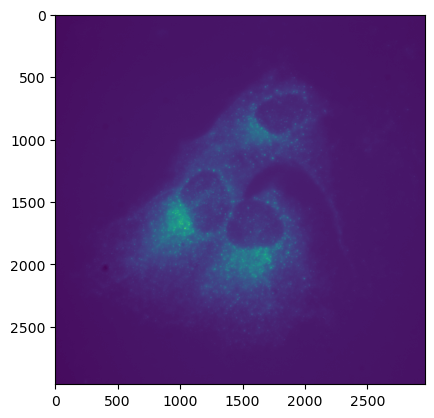

In [72]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

im = imread(r'D:\images\from katie downes\MAX_GRF_1_10_MMStack_Pos0.ome0001.tif')

plt.imshow(im)
print(im.shape)

## Take FFT and plot

Take the FFT and plot it.  We print out the type and shape of FFT so we can understand the format.  We also plot both the fft and shifted fft.

## Wait.  Why the shifted FFT?

This is understood how the FFT values are packed.  For typical images the low frequencies have high magnitude.  So if the highest mangitudes are in the corners, then the zero-frequencies are in the corners.  When we shift the FFT we should see the highest values move to the center.   We need to know where the high and low frequencies are if we want to apply filters. 

(in this case we should discover low frequencies are in the corners, high frequenies in the center, when we shift we see the opposite (which is perhaps more intuitive))

type is  complex128
shape of im  (2960, 2960)
shape of FFT  (2960, 2960)


Text(0.5, 0.98, 'FFT of image')

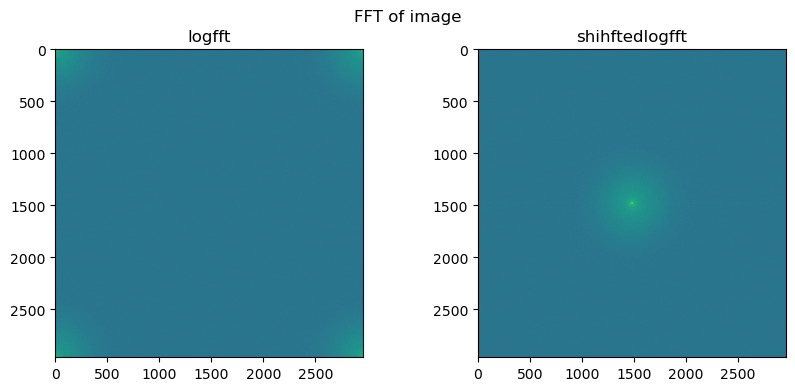

In [74]:
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from tnia.plotting.plt_helper import imshow_multi2d
from skimage.filters import window

imfft = fft2(im)

print('type is ', imfft.dtype)
print('shape of im ', im.shape)
print('shape of FFT ',imfft.shape)

logfft = np.log(np.abs(imfft))
shiftedlogfft = np.log(np.abs(fftshift(imfft)))

fig=imshow_multi2d([logfft, shiftedlogfft], ['logfft', 'shihftedlogfft'], 1, 2)
fig.suptitle('FFT of image')

## Design a log and high frequency filter.

We use a hamming window to make filters then pad to the size of the image.  Note we use a hamming window but there are many other windows we could use (research scipy windows 2d types or something like that)

Note that we 'shift' the low frequency filter, this is because as we discovered above the low frequencies are in the corner.

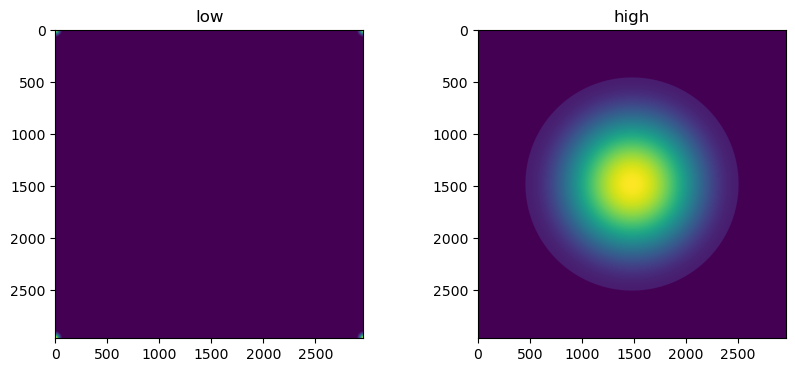

In [76]:
lowsize = [128, 128]
highsize = [2048, 2048]
window_type = 'hamming'

low = window(window_type, lowsize)
low = np.pad(low, ((im.shape[0]//2 - lowsize[0]//2, im.shape[0]//2 - lowsize[0]//2), (im.shape[1]//2 - lowsize[1]//2, im.shape[1]//2 - lowsize[1]//2)), 'constant', constant_values=0)
low = ifftshift(low)
high = window(window_type, highsize)
high = np.pad(high, ((im.shape[0]//2 - highsize[0]//2, im.shape[0]//2 - highsize[0]//2), (im.shape[1]//2 - highsize[1]//2, im.shape[1]//2 - highsize[1]//2)), 'constant', constant_values=0)

fig = imshow_multi2d([low, high], ['low', 'high'], 1, 2)


## Design a band pass filter

Design a band pass filter by adding the low and high, and then taking 1 - (low+high).  Basically we want the inverse because we want to get rid of the low and high frequencies and keep the middle ones.  

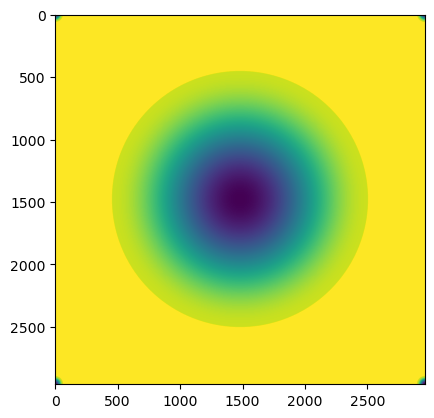

In [78]:
filter_to_use = low+high
filter_to_use = 1-filter_to_use

plt.imshow(filter_to_use)

## Now look at the result

We should see we got rid of noise (unwanted high frequencies) and low frequency background and just see 'edges'

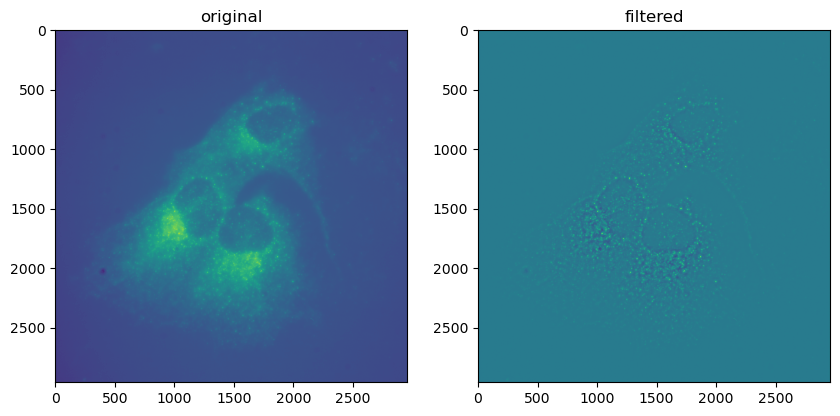

In [80]:

imfft_filtered = imfft*filter_to_use
im_filtered = ifft2(imfft_filtered).real
im_filtered = (im_filtered - im_filtered.min()).astype(np.float32)

fig = imshow_multi2d([im, im_filtered], ['original', 'filtered'], 1, 2, 10, 6, gamma=0.5)

## Look at this in Napari

If you have napari open the images in Napari.  Napari isn't just for 3D, it is a great way to inspect 2D images.

In [48]:
import napari
viewer = napari.Viewer()
viewer.add_image(im)
viewer.add_image(im_filtered)

napari.manifest -> 'napari-hello' could not be imported: Cannot find module 'napari_plugins' declared in entrypoint: 'napari_plugins:napari.yaml'


<Image layer 'im_filtered' at 0x18c19b37bb0>